In [49]:
import pandas as pd
import numpy as np

In [50]:
import time

starting_time = time.time()
data = pd.read_csv('C:/Users/ACER/Downloads/CNDMCK/Machine Learning Algorithm - SVM/RAVTESS_MFCC_Observed.csv')
print("data loaded in " + str(time.time()-starting_time) + "ms")

print(data.head())

data loaded in 0.04165148735046387ms
   Unnamed: 0           0          1          2          3          4  \
0        3271 -407.818512  75.580315 -11.852915  31.199961 -16.573090   
1        2217 -490.924561  68.167824 -37.364124  12.552231  10.389737   
2        2592 -529.380249  95.826050  23.742424  14.620595  12.306251   
3        1999 -425.575470  96.207855  22.187384 -11.168184 -12.332258   
4        1813 -334.018585  33.773918 -12.455565  10.638281 -24.166931   

           5          6          7          8  ...         31         32  \
0  -0.078748 -19.233414 -16.123476 -11.136886  ...   6.114078   2.679012   
1 -25.860634 -12.941109  -0.182181 -16.258718  ...  -0.760857  -3.610590   
2  16.722519 -14.065591 -16.775555 -16.231932  ...  10.309093  12.838900   
3   1.849848 -13.793641   5.021161 -27.955351  ...   0.103434   1.148743   
4   2.093608 -19.775921  -1.650169 -18.283426  ...  10.601710   5.131336   

          33        34        35         36         37         38  

In [51]:
data.shape

(4628, 42)

In [52]:
#printing all columns
data.columns

Index(['Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', 'emotion'],
      dtype='object')

In [53]:
#dropping the column Unnamed: 0 to removed shuffled index
data = data.drop('Unnamed: 0',axis=1)

In [54]:
data.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', 'emotion'],
      dtype='object')

In [55]:
#separating features and target outputs
X = data.drop('emotion', axis = 1).values
y = data['emotion'].values

## SVM

Implementing SVM with Scikit-Learn

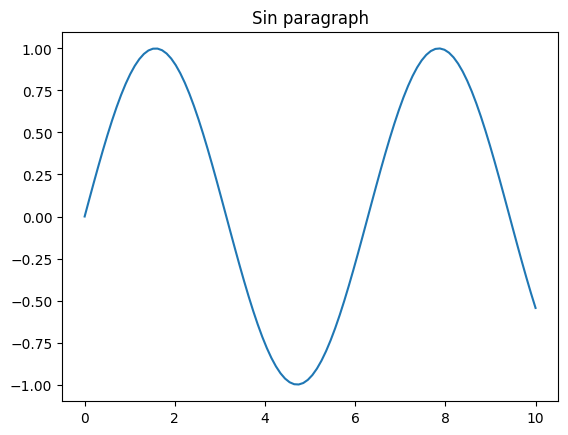

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.plot(x, y)
plt.title("Sin paragraph")
plt.show() 


In [57]:
X.shape, y.shape
#print("Unique labels in y:", np.unique(y))
print(data.head())
print(data.columns)


            0          1          2          3          4          5  \
0 -407.818512  75.580315 -11.852915  31.199961 -16.573090  -0.078748   
1 -490.924561  68.167824 -37.364124  12.552231  10.389737 -25.860634   
2 -529.380249  95.826050  23.742424  14.620595  12.306251  16.722519   
3 -425.575470  96.207855  22.187384 -11.168184 -12.332258   1.849848   
4 -334.018585  33.773918 -12.455565  10.638281 -24.166931   2.093608   

           6          7          8          9  ...         31         32  \
0 -19.233414 -16.123476 -11.136886   2.904638  ...   6.114078   2.679012   
1 -12.941109  -0.182181 -16.258718  -6.914003  ...  -0.760857  -3.610590   
2 -14.065591 -16.775555 -16.231932   8.377729  ...  10.309093  12.838900   
3 -13.793641   5.021161 -27.955351   5.088210  ...   0.103434   1.148743   
4 -19.775921  -1.650169 -18.283426  11.165318  ...  10.601710   5.131336   

          33        34        35         36         37         38         39  \
0   2.425698  2.856661 -1.0946

In [58]:
np.unique(y)

array([-0.99938456, -0.99782778, -0.99075324, -0.98609877, -0.97202182,
       -0.96431712, -0.94338126, -0.93270486, -0.90512352, -0.89158426,
       -0.85763861, -0.84137452, -0.80141062, -0.7825875 , -0.73701276,
       -0.7158225 , -0.66510151, -0.64176014, -0.58640998, -0.56115544,
       -0.54402111, -0.50174037, -0.47483011, -0.45663749, -0.41195583,
       -0.38366419, -0.36459873, -0.31797166, -0.28858706, -0.26884313,
       -0.22074597, -0.19056796, -0.17034683, -0.12126992, -0.09060615,
       -0.07011396, -0.0205576 ,  0.        ,  0.01027934,  0.03083368,
        0.0803643 ,  0.10083842,  0.11106004,  0.13146699,  0.18046693,
        0.20064886,  0.21070855,  0.23076008,  0.27872982,  0.2984138 ,
        0.30820902,  0.32770071,  0.37415123,  0.39313661,  0.40256749,
        0.42130064,  0.46575841,  0.48385164,  0.49282204,  0.51060568,
        0.55261747,  0.56963411,  0.57805259,  0.59470541,  0.63384295,
        0.64960951,  0.65739025,  0.6727425 ,  0.7086068 ,  0.72

X variable contains attributes while y variable contains corresponding labels.

Once the data is divided into attributes and labels, the final preprocessing step is to divide data into training and test sets. The model_selection library of the Scikit-Learn library contains the train_test_split method that allows us to divide data into training and test sets.

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode emotion labels
le = LabelEncoder()
data['emotion'] = le.fit_transform(data['emotion'])

X = data.drop('emotion', axis=1).values
y = data['emotion'].values

print("Unique labels (encoded):", np.unique(y))
print("Label classes:", le.classes_)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



Unique labels (encoded): [0 1 2 3 4 5 6 7]
Label classes: ['angry' 'calm' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprised']


It is the time to train our SVM on the training data. Scikit-Learn contains the svm library, which contains built-in classes for different SVM algorithms. Since we are going to perform a classification task, we will use the support vector classifier class, which is written as SVC in the Scikit-Learn's svm library. We have set the kernel to linear.

In [60]:
from sklearn.svm import SVC

svclassifier = SVC(kernel = 'linear')

The fit method of SVC class is called to train the algorithm on the training data, which is passed as a parameter to the fit method. Execute the following code to train the algorithm:

In [61]:
import time

starting_time = time.time()
svclassifier.fit(X_train, y_train)
print("Trained model in %s ms " % str(time.time() - starting_time))

Trained model in 4.933996677398682 ms 


To make predictions, the predict method of the SVC class is used.

In [62]:
y_pred = svclassifier.predict(X_test)

Confusion matrix, precision, recall, and F1 measures are the most commonly used metrics for classification tasks. Scikit-Learn's metrics library contains the classification_report and confusion_matrix methods, which can be readily used to find out the values for these important metrics.
We have used the following code for finding these metrics:

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       149
           1       0.88      0.85      0.87        27
           2       0.93      0.99      0.96       114
           3       0.84      0.89      0.86       132
           4       0.92      0.90      0.91       133
           5       0.99      0.96      0.97       117
           6       0.94      0.84      0.89       133
           7       0.98      1.00      0.99       121

    accuracy                           0.93       926
   macro avg       0.93      0.92      0.92       926
weighted avg       0.93      0.93      0.93       926

----accuracy score 92.65658747300216 ----


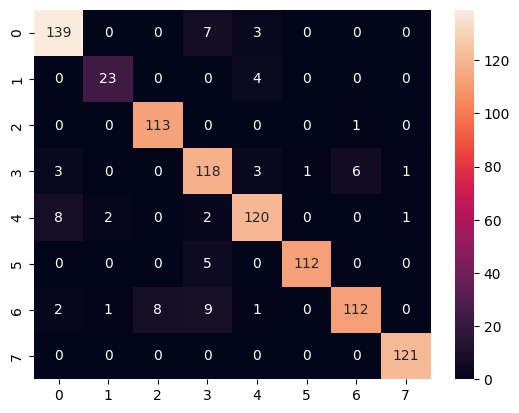

In [63]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sn

print(classification_report(y_test,y_pred))

acc = float(accuracy_score(y_test,y_pred))*100
print("----accuracy score %s ----" % acc)

cm = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm)
sn.heatmap(df_cm, annot=True, fmt='')
plt.show()

Now by calculating the training accuracy and comparing with testing accuracy, we can check for overfitting of data

In [64]:
train_acc = float(svclassifier.score(X_train, y_train)*100)
print("----train accuracy score %s ----" % train_acc)

test_acc = float(svclassifier.score(X_test, y_test)*100)
print("----test accuracy score %s ----" % test_acc)

----train accuracy score 96.97460831982711 ----
----test accuracy score 92.65658747300216 ----


## Cross-Validation

5-fold cross validation of the dataset with the SVC classifier.

In [65]:
from sklearn.model_selection import cross_val_score

# no. of folds cv = 5
cv_results = cross_val_score(svclassifier, X, y, cv = 5)
print(cv_results)

[0.93952484 0.92548596 0.94168467 0.93621622 0.93081081]


## Scaling 

When performing the linear SVM classification, it is often helpful to normalize the training data, for example by subtracting the mean and dividing by the standard deviation, and afterwards scale the test data with the mean and standard deviation of training data.

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC


#splitting dataset into train/ test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('SVM', SVC())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training set: svc_scaled
svc_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a classifier to the unscaled data
svc_unscaled = SVC(kernel = 'linear').fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(svc_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(svc_unscaled.score(X_test, y_test)))


Accuracy with Scaling: 0.9740820734341252
Accuracy without Scaling: 0.9341252699784017


### Generalization check
Checking for overfitting or underfitting by comparing the training and testing scores of the model

In [67]:
train_acc = float(svc_scaled.score(X_train, y_train)*100)
print("----train accuracy score %s ----" % train_acc)

test_acc = float(svc_scaled.score(X_test, y_test)*100)
print("----test accuracy score %s ----" % test_acc)

----train accuracy score 98.78444084278767 ----
----test accuracy score 97.40820734341253 ----


In [68]:
scaled_predictions = svc_scaled.predict(X_test)

### Classification reports and Confusion Matrix

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       142
           1       0.69      0.95      0.80        21
           2       1.00      1.00      1.00       106
           3       0.97      0.94      0.95       147
           4       0.98      0.95      0.97       137
           5       1.00      0.99      1.00       130
           6       0.96      0.98      0.97       131
           7       1.00      1.00      1.00       112

    accuracy                           0.97       926
   macro avg       0.95      0.97      0.96       926
weighted avg       0.98      0.97      0.97       926

----accuracy score 97.40820734341253 ----


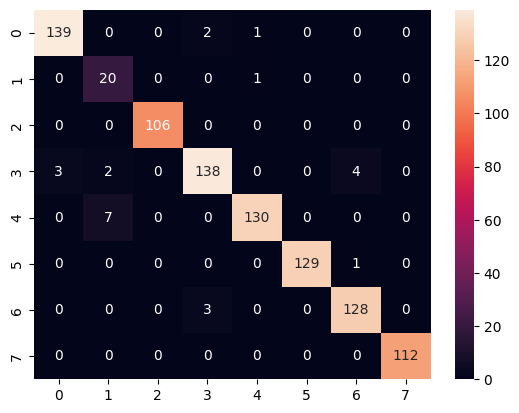

In [69]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sn

print(classification_report(y_test,scaled_predictions))

acc = float(accuracy_score(y_test,scaled_predictions))*100
print("----accuracy score %s ----" % acc)

cm = confusion_matrix(y_test,scaled_predictions)
df_cm = pd.DataFrame(cm)
sn.heatmap(df_cm, annot=True, fmt='')
plt.show()

#### Cross Validation

In [70]:
from sklearn.model_selection import cross_val_score

# no. of folds cv = 5
cv_results = cross_val_score(svc_scaled, X, y, cv = 5)
print(cv_results)

[0.97840173 0.96544276 0.97732181 0.97297297 0.96432432]


In [72]:
import pickle
with open("SVM_model_with_scaling.pkl", "wb") as f:
    pickle.dump(svc_scaled, f)